In [1]:
import igraph
import copy
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import os
import glob

%matplotlib inline

#why need download?
#3m resolution

#1. copublish use Ox' license 
#2. slider
#recurring problem - needs to look at construction sites
#
# Green info - little engine for 
# can we find another source?
# 

In [2]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

g_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='green')and (f.split('/')[-1].split('_')[2]=='MW.csv') ) ])
b_MW_files =sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='blue') and (f.split('/')[-1].split('_')[2]=='MW.csv') )])
all_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='all') and (f.split('/')[-1].split('_')[2]=='MW.csv'))])

print all_MW_files

['./matrix_csvs/2004.75_all_MW.csv', './matrix_csvs/2007.75_all_MW.csv', './matrix_csvs/2008.XX_all_MW.csv', './matrix_csvs/2009.XX_all_MW.csv', './matrix_csvs/2010.XX_all_MW.csv', './matrix_csvs/2011.XX_all_MW.csv', './matrix_csvs/2012.XX_all_MW.csv', './matrix_csvs/2013.XX_all_MW.csv', './matrix_csvs/2014.75_all_MW.csv', './matrix_csvs/2015.0_all_MW.csv', './matrix_csvs/2015.25_all_MW.csv', './matrix_csvs/2015.5_all_MW.csv', './matrix_csvs/2015.75_all_MW.csv', './matrix_csvs/2016.0_all_MW.csv', './matrix_csvs/2016.25_all_MW.csv', './matrix_csvs/2016.5_all_MW.csv', './matrix_csvs/2016.75_all_MW.csv', './matrix_csvs/2017.0_all_MW.csv', './matrix_csvs/2017.25_all_MW.csv', './matrix_csvs/2017.5_all_MW.csv', './matrix_csvs/2017.75_all_MW.csv']


In [8]:
""" get a dict going with files and data """
data = {}
years = range(2007,2018)
for y in years:
    fname_all = [f for f in all_MW_files if (((str(y)+'.XX') in f) or ((str(y)+'.75') in f))][0]
    fname_g = [f for f in g_MW_files if (((str(y)+'.XX') in f) or ((str(y)+'.75') in f))][0]
    fname_b = [f for f in b_MW_files if (((str(y)+'.XX') in f) or ((str(y)+'.75') in f))][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0,
             'fname_g':fname_g,
             'data_g':0.0,
             'fname_b':fname_b,
             'data_b':0.0}
    
print data[2016]['data_all']

0.0


In [9]:
""" read in all the data """
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_g']=pd.read_csv(data[y]['fname_g'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_b']=pd.read_csv(data[y]['fname_b'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_ff'] = data[y]['data_all'].subtract(data[y]['data_g'], fill_value=0.0).subtract(data[y]['data_b'], fill_value=0.0)

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [10]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def degree(x):
    #print x
    #print 'softmax: ', softmax(x)
    #raw_input('-->')
    return np.sum(softmax(x)/np.max(x))/x.shape[0]

In [11]:
""" get dregree for all data"""

for y in years:
    for data_str in ['data_all','data_g','data_b', 'data_ff']:
        df = data[y][data_str]
        #degree just with connections
        df['degree'] = df[df>0].count(axis=1)
    
        #degree with algo
        #df['degree'] = df.apply(lambda row: degree(row/np.sum(row)), axis=1)
    

        cols = [c for c in list(df) if len(c)<3]
        df['sum'] = df[cols].sum(axis=1)
        df['cumsum'] = df['sum'].cumsum()
    
        data[y][data_str] = df.sort_values('sum', ascending=False)


2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


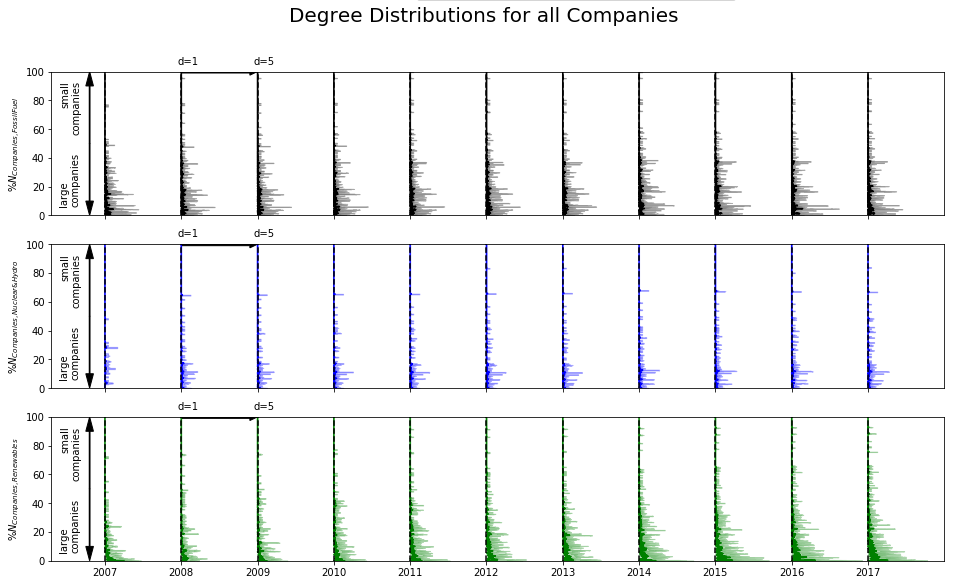

0.376463415038


In [12]:
""" lets plot them degrees """
import matplotlib.patches as mpatches
import matplotlib.lines as mlines



f, axarr = plt.subplots(3,sharex=True, figsize=(16,9))
axarr[0].set_xlim(2006.3,2018)
axarr[0].set_xticks(years)
#axarr[0].set_xtickabels(years)

axarr[0].set_ylim(0,100)
axarr[1].set_ylim(0,100)
axarr[2].set_ylim(0,100)

axarr[0].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[1].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[2].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)

axarr[0].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[1].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[2].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)

axarr[0].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[1].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[2].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)

axarr[0].text(2007.95, 105,'d=1')
axarr[1].text(2007.95, 105,'d=1')
axarr[2].text(2007.95, 105,'d=1')

axarr[0].text(2008.95, 105,'d=5')
axarr[1].text(2008.95, 105,'d=5')
axarr[2].text(2008.95, 105,'d=5')

cols_dict={0:'black',1:'blue',2:'green'}

axarr[0].set_ylabel('%$N_{Companies, Fossil Fuel}$')
axarr[1].set_ylabel('%$N_{Companies, Nuclear & Hydro}$')
axarr[2].set_ylabel('%$N_{Companies, Renewables}$')

degree_means = []

for y in years:
    print y
    ii=0
    for data_str in ['data_ff','data_b','data_g']:
        df = data[y][data_str]
        degree_means.append(df.degree.mean())
    
        df = df.drop(df[df.degree<1.0].index)
        #print df['sum'].sum(axis=0)
        verts = np.arange(len(df))/float(len(df))*100
        degrees = ((df.degree.rolling(50, min_periods=1).mean())-1.0)/4.0#-df.degree.min())*500
        #print 'max degrees', degrees.max()*5
        #print degrees
        degrees_std = degrees+(df.degree.rolling(50, min_periods=1).std())/4.0#*500
        #print 'max std', degrees_std.max()*5
        degrees = degrees+y
        degrees_std = degrees_std+y
        #print degrees.values
    
        #print verts
        #print degrees
        #print degrees_std
        axarr[ii].plot(degrees.values,verts, color=cols_dict[ii])
        axarr[ii].fill_betweenx(verts,y,degrees_std.values, alpha=0.3, color=cols_dict[ii])
        #axarr[0].plot(degrees_std.values,verts)
        #vert = np.arange(len(df))/df['sum'].sum(axis)
    

        axarr[ii].axvline(x=y, color='k', linestyle='--')
    
        #print data[y]['data']
    
        #axarr[2].scatter(df_test['degree'],df_test['cumsum'])
        #axarr[2].violinplot(df_test['degree'],positions = [1.0], widths=50, points=10000)
        #axarr[2].set_ylabel('ALL_Cumulative_Sum')
        #f.savefig(os.path.join('output',path['ID'],'_ndwi_stats.png'))
        
        ii+=1
f.suptitle('Degree Distributions for all Companies', fontsize=20)


gray_patch = mpatches.Patch(color='gray', label='The red data')
black_line = mlines.Line2D([0],[0],color='black')

f.legend((black_line,gray_patch), ('$Rolling\_Mean_{window=50}$','$Rolling\_StdDev_{window=50}$'), loc='center', bbox_to_anchor=(0.5,0.92), ncol=2)
f.savefig('out.png')
plt.show()

print np.mean(degree_means)
